# Data

In [1]:
import numpy as np  #Import NumPy library
import os
import networkx as nx
from tqdm import tqdm                                   # Import tqdm for progress bar

Inputs = [''] * 7
Inputs[0]= N = 1000    #Number_of_node
Inputs[1] = 0       #Initial_time
Inputs[2] = 0.01    #Time_step
Inputs[3] = 400      #Total_time
Inputs[4] = 0       #Start_coupling
Inputs[5] = 0.01     #coupling_step
Inputs[6] = 3       #End_coupling
Frustration=1.57    #Frustration
Matrix_I='Fully'    #adj matrix I [fully,Erdős_Rényi] (Intralayeradjacencymatrix)
Matrix_II='Fully'   #adj matrix II[fully,Erdős_Rényi] (Intralayeradjacencymatrix)

Interlayer_connection='Fully' #(Interlayer connection)
Intralayer_frustration=0       #b=(Intralayer frustration)
Interlayer_coupling=10          #L=Interlayer coupling

InitialPhases='Uniform'

Natfreq_min=-0.5
Natfreq_max=0.5

Natfreq_dw=0.8



# Data
cleaned_inputs = [str(int(x)) if isinstance(x, (int, float)) and x == int(x) else str(x) for x in Inputs]
np.savetxt('./data.txt', cleaned_inputs, fmt='%s')
print('📄 Create a data file for parameters data.')

# Example
os.makedirs('./Example', exist_ok=True)
print('📂 Create a Example folder for parameters data.')

# Frustration
os.makedirs('./Example/a=Interlayer frustration', exist_ok=True)
Frustration_array = np.full(N, Frustration)
np.savetxt('./Example/a=Interlayer frustration/Layer1to2.txt', Frustration_array, fmt='%s')
np.savetxt('./Example/a=Interlayer frustration/Layer2to1.txt', Frustration_array, fmt='%s')
print('📃 Create Frustrations data.')


# Matrix
# Intralayer adjacency matrices
os.makedirs('./Example/A=Intralayeradjacencymatrix', exist_ok=True)
if Matrix_I=='Fully':
    adj_I = np.ones((N, N))
    np.fill_diagonal(adj_I, 0)
    np.savetxt('./Example/A=Intralayeradjacencymatrix/Layer1.txt', adj_I, fmt='%i')
if Matrix_II=='Fully':
    adj_II = np.ones((N, N))
    np.fill_diagonal(adj_II, 0)
    np.savetxt('./Example/A=Intralayeradjacencymatrix/Layer2.txt', adj_II, fmt='%i')
if Matrix_I=='Erdős_Rényi':
    adj_I = nx.to_numpy_array(nx.erdos_renyi_graph(n=N, p=1))
    np.savetxt('./Example/A=Intralayeradjacencymatrix/Layer1.txt', adj_I, fmt='%f')
if Matrix_II=='Erdős_Rényi':
    adj_II = nx.to_numpy_array(nx.erdos_renyi_graph(n=N, p=1))
    np.savetxt('./Example/A=Intralayeradjacencymatrix/Layer2.txt', adj_II, fmt='%f')
print('📃 Create adjacency matrices data.')


#Interlayer connection
os.makedirs('./Example/B=Interlayer connection', exist_ok=True)
if Interlayer_connection=='Fully':
    arr_connection=np.ones(N)
    np.savetxt('./Example/B=Interlayer connection/Layer1to2.txt', arr_connection, fmt='%i')
    np.savetxt('./Example/B=Interlayer connection/Layer2to1.txt', arr_connection, fmt='%i')
print('📃 Create Interlayer connection data.')


#Intralayer frustration
os.makedirs('./Example/b=Intralayer frustration', exist_ok=True)
Intralayer_frustration_array = np.full((N,N), Intralayer_frustration)
np.savetxt('./Example/b=Intralayer frustration/Layer1.txt', Intralayer_frustration_array, fmt='%i', delimiter='\t')
np.savetxt('./Example/b=Intralayer frustration/Layer2.txt', Intralayer_frustration_array, fmt='%i', delimiter='\t')
print('📃 Create Intralayer frustration data.')


#I=InitialPhases
os.makedirs('./Example/I=InitialPhases', exist_ok=True)
if InitialPhases=='Uniform':
    initial_theta_I = np.random.uniform(-np.pi, np.pi, size=N)
    initial_theta_II = np.random.uniform(-np.pi, np.pi, size=N)
    np.savetxt('./Example/I=InitialPhases/origin1.txt', initial_theta_I, fmt='%.3f')
    np.savetxt('./Example/I=InitialPhases/origin2.txt', initial_theta_II, fmt='%.3f')
    print('📃 Create Initial Phases data.')


#L=Interlayer_coupling
os.makedirs('./Example/L=Interlayer coupling', exist_ok=True)
Interlayer_coupling_array = np.full(N, Interlayer_coupling)
np.savetxt('./Example/L=Interlayer coupling/Layer1to2.txt', Interlayer_coupling_array, fmt='%i')
np.savetxt('./Example/L=Interlayer coupling/Layer2to1.txt', Interlayer_coupling_array, fmt='%i')
print('📃 Create Interlayer coupling data.')


#W=Naturalfrequency
os.makedirs('./Example/W=Naturalfrequency', exist_ok=True)
natfreqs_I = np.linspace(Natfreq_min, Natfreq_max, N)                      # Create linearly spaced array x_I from -0.5 to 0.5 with 1000 points
natfreqs_II = np.linspace(Natfreq_min, Natfreq_max, N)                     # Create another identical array x_II
def calculate_dw(x_I, x_II):                            # Function to calculate dw based on absolute differences
    N = len(x_I)                                        # Number of points
    total_abs_diff = np.sum(np.abs(x_I - x_II))         # Sum of absolute node-wise differences
    dw = total_abs_diff / (2 * np.sum(np.abs(x_I)))     # Compute dw using the given formula
    return dw
def adjust_nodes(x_I, x_II, target_dw=Natfreq_dw):             # Function to adjust nodes in x_II to increase dw (with progress bar)
    max_iters = len(x_II) // 2                          # Max possible swaps (symmetric)
    with tqdm(total=max_iters, desc="Adjusting nodes", unit="swap", disable=True) as pbar:
        for iteration in range(max_iters):
            dw = calculate_dw(x_I, x_II)                # Compute current dw
            if dw >= target_dw:                         # Stop if target met
                break                                   # Swap mirrored nodes in x_II
            x_II[iteration], x_II[-iteration - 1] = x_II[-iteration - 1], x_II[iteration]
            pbar.update(1)                              # Update progress bar
    return x_II,dw
natfreqs_II,final_dw = adjust_nodes(natfreqs_I, natfreqs_II)                 # Adjust x_II nodes to meet target dw
np.savetxt('./Example/W=Naturalfrequency/Layer1.txt', natfreqs_I, fmt='%.5f')
np.savetxt('./Example/W=Naturalfrequency/Layer2.txt', natfreqs_II, fmt='%.5f')
print('📃 Create Natural frequency data.',f"Final dw: {final_dw}")




#create save folders
os.makedirs('./Save', exist_ok=True)
os.makedirs('./Save/Last_Phase', exist_ok=True)
os.makedirs('./Save/Phases(time)VS(Node)', exist_ok=True)
print('📂Create a folders for Save data. ')

📄 Create a data file for parameters data.
📂 Create a Example folder for parameters data.
📃 Create Frustrations data.
📃 Create adjacency matrices data.
📃 Create Interlayer connection data.
📃 Create Intralayer frustration data.
📃 Create Initial Phases data.
📃 Create Interlayer coupling data.
📃 Create Natural frequency data. Final dw: 0.8010840000000001
📂Create a folders for Save data. 


# Kuramoto.Version5.h file

In [2]:
cpp_code = """#ifndef KURAMOTO_VERSION5_H_INCLUDED
#define KURAMOTO_VERSION5_H_INCLUDED
/*****************************************************************************************************************************/
/*** In our simulation, we consider N = 1000. The initial phases of the oscillators are randomly sampled from a uniform    ***/
/*** distribution within the range -pi to pi. To obtain the results, we numerically solve the equations described   ***/
/*** in Equation (1) using the fourth-order Runge-Kutta method with a time step of dt = 0.01. The simulation is conducted  ***/
/*** for a total of 40,000 steps. In our simulation, we calculate the average RI(II) over the final 80p of the simulation  ***/
/*** duration, which corresponds to the period when the system has settled into a steady state.                            ***/
/*****************************************************************************************************************************/
/*** Topic: Dynamic Runge-Kutta 4th Order Method application								                               ***/
/***        solved numerically using RungeKutta 4th order method                                                           ***/
/*** Investigating the effect of frequency arrangement of the nodes in the dynamics of two-layer networks                  ***/
/*** Version Release 17.12 rev 11256                                                Ali-Seif                               ***/
/*** Github address:                                            https://github.com/AliSeif96                               ***/
/***                                                            https://github.com/Articles-data/Frequency-Arrangement     ***/
/*** The latest code update: 09/17/2024                                                                                    ***/
/*** Code implemented in Code:Visual Studio Code V 1.93.1                                                                  ***/
/*** MSI: PX60 6QD/ DDR4                                                                                                   ***/
/*** Run under a Intel Core i7-6700HQ CPU @ 2.60GHz  64 based processor with 16 GB RAM                                     ***/
/*****************************************************************************************************************************/
//$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#include<iostream>//for cout                                                                                               $$$$
#include<fstream>//infile /ofstream                                                                                        $$$$
#include <string>//for stod( )                                                                                             $$$$
#include <sstream>//stringstream ss(line)                                                                                  $$$$
#include<ctime>//For Example clock()                                                                                       $$$$
#include <cmath>//For Example pow                                                                                          $$$$
#include <omp.h>//                                                                                                         $$$$
#include <stdio.h>//                                                                                                       $$$$
#define Pi 3.141592653589793238462643383279502884//pi number                                                               $$$$
using namespace std;//                                                                                                     $$$$
//$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
//-----------------------------------------------------------------------------------------------------------------------------
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                          Runge-Kutta 4th                                                $$$$
//                                                          --------------                                                 $$$$
//                                                          \            /                                                 $$$$
//                                                           \          /                                                  $$$$
//                                                            \        /                                                   $$$$
//                                                             \      /                                                    $$$$
//                                                              \    /                                                     $$$$
//                                                               \  /                                                      $$$$
//                                                                \/                                                       $$$$
//-----------------------------------------------------------------------------------------------------------------------------
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                                     dydt                                       @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double dydt(int specified,int N,double coupling,double W,double L,double B,         //@@@                                   ---
            double a,const double* b,const double* A,double Phase_old_otherlayer,   //@@@                                   ---
            double* Phase_old,double Phase_old_specified)                           //@@@                                   ---
{                                                                                   //@@@                                   ---
    double summation = 0.0;                                                         //@@@                                   ---
    for (int i = 0; i < N; i++){                                                    //@@@                                   ---
        summation += (A[i] * sin((Phase_old[i] - Phase_old_specified + b[i])));     //@@@                                   ---
    }                                                                               //@@@                                   ---
    double connection = 0.0;                                                        //@@@                                   ---
    connection = (L*B*sin(Phase_old_otherlayer-Phase_old_specified+a));             //@@@                                   ---
    double k = 0;                                                                   //@@@      connection calculated        ---
    k = W + ((coupling/(N * 1.0))*summation) + connection;                          //@@@               all sum             ---
    return k;                                                                       //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                                CCRK4                                           @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
void Runge_Kutta_4(int N,double dt,double coupling,const double* W,const double* L, //@@@                                   ---
                   const double* B,const double* a,const double* const* b,          //@@@                                   ---
                   const double* const* A,double* Phase_old,                        //@@@                                   ---
                   double* Phase_old_otherlayer,double* Phase_new)                  //@@@                                   ---
{                                                                                   //@@@                                   ---
    for (int i = 0; i < N; i++)                                                     //@@@                                   ---
        {                                                                           //@@@                                   ---   
            double k1 = dydt(i,N,coupling,W[i],L[i],B[i],a[i],b[i],A[i],            //@@@                                   ---
                            Phase_old_otherlayer[i],Phase_old,Phase_old[i]);        //@@@                                   ---                                                                       //@@@                                   ---
            double k2 = dydt(i,N,coupling,W[i],L[i],B[i],a[i],b[i],A[i],            //@@@                                   ---
                            Phase_old_otherlayer[i],Phase_old,Phase_old[i]+k1*dt/2.0);//@                                   ---
            double k3 = dydt(i,N,coupling,W[i],L[i],B[i],a[i],b[i],A[i],            //@@@                                   ---
                            Phase_old_otherlayer[i],Phase_old,Phase_old[i]+k2*dt/2.0);//@                                   ---
            double k4 = dydt(i,N,coupling,W[i],L[i],B[i],a[i],b[i],A[i],            //@@@                                   ---
                            Phase_old_otherlayer[i],Phase_old,Phase_old[i]+k3*dt);  //@@@                                   ---
            Phase_new[i] = Phase_old[i]+dt/6.0*(k1+2.0*k2+2.0*k3+k4);               //@@@                                   ---
        }                                                                           //@@@                                   ---
}                                                                                   //@@@                                   ---
//-----------------------------------------------------------------------------------------------------------------------------
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                         Order Parameter                                                 $$$$
//                                                          --------------                                                 $$$$
//                                                          \            /                                                 $$$$
//                                                           \          /                                                  $$$$
//                                                            \        /                                                   $$$$
//                                                             \      /                                                    $$$$
//                                                              \    /                                                     $$$$
//                                                               \  /                                                      $$$$
//                                                                \/                                                       $$$$
//-----------------------------------------------------------------------------------------------------------------------------
//-----------------------------------------------------------------------------------------------------------------------------
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                                Check scale -pi tp pi                           @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
void check_scale(int N, double* phi)                                                //@@@                                   ---
{                                                                                   //@@@                                   ---
    for (int i = 0; i < N; i++)                                                     //@@@                                   ---
    {                                                                               //@@@                                   ---
        while(abs(phi[i])>Pi){                                                      //@@@                                   ---
            if (phi[i]>0){                                                          //@@@                                   ---
                phi[i]=phi[i]-2*Pi;                                                 //@@@                                   ---
            }else if(phi[i]<0){                                                     //@@@                                   ---
                phi[i]=phi[i]+2*Pi;                                                 //@@@                                   ---
            }                                                                       //@@@                                   ---
        }                                                                           //@@@                                   ---
    }                                                                               //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                                order_parameter                                 @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double order_parameter(int N, double* phi)                                          //@@@                                   ---
{                                                                                   //@@@                                   ---
    double rc = 0.0, rs = 0.0;                                                      //@@@                                   ---
    for (int j = 0; j < N; j++)                                                     //@@@                                   ---
    {                                                                               //@@@                                   ---
        rc += cos(phi[j]);                                                          //@@@                                   ---
        rs += sin(phi[j]);                                                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    return sqrt(pow(rc, 2) + pow(rs, 2)) / (1.0 * N);                               //@@@                                   ---
}                                                                                   //@@@                                   ---











double TGroup_order_parameter(double* phi)                                          //@@@                                   ---
{                                                                                   //@@@                                   ---
    int First=0;
    int End=1000;   
    int size=End-First;

    double rc = 0.0, rs = 0.0;                                                      //@@@                                   ---
    for (int j = 0; j < 1000; j++)                                                     //@@@                                   ---
    {                                                                               //@@@                                   ---
        rc += cos(phi[j]);                                                          //@@@                                   ---
        rs += sin(phi[j]);                                                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    return sqrt(pow(rc, 2) + pow(rs, 2)) / (1.0 * size);                               //@@@                                   ---
}                                                                                   //@@@                                   ---
double LGroup_order_parameter(double* phi)                                          //@@@                                   ---
{                                                                                   //@@@                                   ---
    int First=0;
    int End=277;
    int size=End-First;
 
    double rc = 0.0, rs = 0.0;                                                      //@@@                                   ---
    for (int j = 0; j < 277; j++)                                                     //@@@                                   ---
    {                                                                               //@@@                                   ---
        rc += cos(phi[j]);                                                          //@@@                                   ---
        rs += sin(phi[j]);                                                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    return sqrt(pow(rc, 2) + pow(rs, 2)) / (1.0 * size);                               //@@@                                   ---
}                                                                                   //@@@                                   ---
double MGroup_order_parameter( double* phi)                                          //@@@                                   ---
{                                                                                   //@@@                                   ---
    int First=277;
    int End=723;  
    int size=End-First;

    double rc = 0.0, rs = 0.0;                                                      //@@@                                   ---
    for (int j = 277; j < 723; j++)                                                     //@@@                                   ---
    {                                                                               //@@@                                   ---
        rc += cos(phi[j]);                                                          //@@@                                   ---
        rs += sin(phi[j]);                                                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    return sqrt(pow(rc, 2) + pow(rs, 2)) / (1.0 * size);                               //@@@                                   ---
}                                                                                   //@@@                                   ---
double RGroup_order_parameter( double* phi)                                          //@@@                                   ---
{      
    int First=723;
    int End=1000;                                                                             //@@@                                   ---
    int size=End-First;

    double rc = 0.0, rs = 0.0;                                                      //@@@                                   ---
    for (int j = First; j < End; j++)                                                     //@@@                                   ---
    {                                                                               //@@@                                   ---
        rc += cos(phi[j]);                                                          //@@@                                   ---
        rs += sin(phi[j]);                                                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    return sqrt(pow(rc, 2) + pow(rs, 2)) / (1.0 * size);                               //@@@                                   ---
}                                                                                   //@@@                                   ---








//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                                  previous phases                               @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* for_loop_equal(double* Phase) {                                             //@@@calculate initial theta            ---
    return Phase;                                                                   //@@@                                   ---
}                                                                                   //@@@                                   ---
//-----------------------------------------------------------------------------------------------------------------------------
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                        read file to arrey                                               $$$$
//                                                          --------------                                                 $$$$
//                                                          \            /                                                 $$$$
//                                                           \          /                                                  $$$$
//                                                            \        /                                                   $$$$
//                                                             \      /                                                    $$$$
//                                                              \    /                                                     $$$$
//                                                               \  /                                                      $$$$
//                                                                \/                                                       $$$$
//-----------------------------------------------------------------------------------------------------------------------------
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                               W=Naturalfrequency .txt                          @@@@ Read data from text               ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* read_1D_W(string Filename, int Numberofnode)                                //@@@ (Phases & frequency & Matrix)     ---
{                                                                                   //@@@                                   ---
    double* data_1D = new double[Numberofnode];                                     //@@@                                   ---
    ifstream file("./Example/W=Naturalfrequency/" + Filename + ".txt");             //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING! W=Natural frequency file is not here!" << endl;           //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            file >> data_1D[i];                                                     //@@@                                   ---
        }                                                                           //@@@                                   ---
        cout << "W of "<<Filename + "\\tloaded\\t First data=" <<                     //@@@                                   ---
         data_1D[0]<< "\\tLastst data="<< data_1D[Numberofnode-1] <<endl;            //@@@                                   ---
    }                                                                               //@@@                                   ---
    file.close();                                                                   //@@@                                   ---
    return data_1D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                               I=InitialPhases .txt                             @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* read_1D_I(string Filename, int Numberofnode)                                //@@@                                   ---
{                                                                                   //@@@                                   ---
    double* data_1D = new double[Numberofnode];                                     //@@@                                   ---
    ifstream file("./Example/I=InitialPhases/" + Filename + ".txt");                //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING! W=Natural frequency file is not here!" << endl;           //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            file >> data_1D[i];                                                     //@@@                                   ---
        }                                                                           //@@@                                   ---
        cout << "I of "<<Filename + "\\tloaded\\t First data=" <<                     //@@@                                   ---
         data_1D[0]<< "\\tLastst data="<< data_1D[Numberofnode-1] <<endl;            //@@@                                   ---
    }                                                                               //@@@                                   ---
    file.close();                                                                   //@@@                                   ---
    return data_1D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                       B=Interlayer connection .txt                             @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* read_1D_B(string Filename, int Numberofnode)                                //@@@                                   ---
{                                                                                   //@@@                                   ---
    double* data_1D = new double[Numberofnode];                                     //@@@                                   ---
    ifstream file("./Example/B=Interlayer connection/" + Filename + ".txt");        //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING!\\tB=Interlayer connection\\t"<<Filename<<                   //@@@                                   ---
        " file is not here!" << endl;                                               //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            file >> data_1D[i];                                                     //@@@                                   ---
        }                                                                           //@@@                                   ---
        cout << "B of "<<Filename + "\\tloaded\\t First data=" <<                     //@@@                                   ---
         data_1D[0]<< "\\tLastst data="<< data_1D[Numberofnode-1] <<endl;            //@@@                                   ---
    }                                                                               //@@@                                   ---
    file.close();                                                                   //@@@                                   ---
    return data_1D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                       B=Interlayer connection .txt                             @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* read_1D_a(string Filename, int Numberofnode)                                //@@@                                   ---
{                                                                                   //@@@                                   ---
    double* data_1D = new double[Numberofnode];                                     //@@@                                   ---
    ifstream file("./Example/a=Interlayer frustration/" + Filename + ".txt");       //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING!\\ta=Interlayer frustration\\t"<<Filename<<                  //@@@                                   ---
        " file is not here!" << endl;                                               //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            file >> data_1D[i];                                                     //@@@                                   ---
        }                                                                           //@@@                                   ---
        cout << "a of "<<Filename + "\\tloaded\\t First data=" <<                     //@@@                                   ---
         data_1D[0]<< "\\tLastst data="<< data_1D[Numberofnode-1] <<endl;            //@@@                                   ---
    }                                                                               //@@@                                   ---
    file.close();                                                                   //@@@                                   ---
    return data_1D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                       B=Interlayer connection .txt                             @@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* read_1D_L(string Filename, int Numberofnode)                                //@@@                                   ---
{                                                                                   //@@@                                   ---
    double* data_1D = new double[Numberofnode];                                     //@@@                                   ---
    ifstream file("./Example/L=Interlayer coupling/" + Filename + ".txt");          //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING!\\tL=Interlayer coupling\\t"<<Filename<<                     //@@@                                   ---
        " file is not here!" << endl;                                               //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            file >> data_1D[i];                                                     //@@@                                   ---
        }                                                                           //@@@                                   ---
        cout << "L of "<<Filename + "\\tloaded\\t First data=" <<                     //@@@                                   ---
         data_1D[0]<< "\\tLastst data="<< data_1D[Numberofnode-1] <<endl;            //@@@                                   ---
    }                                                                               //@@@                                   ---
    file.close();                                                                   //@@@                                   ---
    return data_1D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                          Read matrix connection                               //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double** read_2D_b(string Filename, int Numberofnode)                               //@@@                                   ---
{                                                                                   //@@@                                   ---
    double** data_2D = new double* [Numberofnode];                                  //@@@                                   ---
    for (int i = 0; i < Numberofnode; i++)                                          //@@@                                   ---
        data_2D[i] = new double[Numberofnode];                                      //@@@                                   ---
    ifstream file("./Example/b=Intralayer frustration/" + Filename + ".txt");       //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING!\\tb=Intralayer frustration matrix\\t"<<Filename<<           //@@@                                   ---
        " file is not here!" << endl;                                               //@@@                                   ---
        return data_2D;                                                             //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            for (int j = 0; j < Numberofnode; j++)                                  //@@@                                   ---
            {                                                                       //@@@                                   ---
                double elem = 0;                                                    //@@@                                   ---
                file >> elem;                                                       //@@@                                   ---
                data_2D[i][j] = elem;                                               //@@@                                   ---
            }                                                                       //@@@                                   ---
        }                                                                           //@@@                                   ---
    }                                                                               //@@@                                   ---
            cout << "b of "<<Filename + "\\tloaded\\t First data=" <<                 //@@@                                   ---
         data_2D[0][1]<< "\\tLastst data="<< data_2D[0][Numberofnode-1] <<endl;      //@@@                                   ---
    return data_2D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                          Read matrix connection                               //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double** read_2D_A(string Filename, int Numberofnode)                               //@@@                                   ---
{                                                                                   //@@@                                   ---
    double** data_2D = new double* [Numberofnode];                                  //@@@                                   ---
    for (int i = 0; i < Numberofnode; i++)                                          //@@@                                   ---
        data_2D[i] = new double[Numberofnode];                                      //@@@                                   ---
    ifstream file("./Example/A=Intralayeradjacencymatrix/" + Filename + ".txt");    //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING!\\tA=Intralayer adjacency matrix\\t"<<Filename<<             //@@@                                   ---
        " file is not here!" << endl;                                               //@@@                                   ---
        return data_2D;                                                             //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
        for (int i = 0; i < Numberofnode; i++)                                      //@@@                                   ---
        {                                                                           //@@@                                   ---
            for (int j = 0; j < Numberofnode; j++)                                  //@@@                                   ---
            {                                                                       //@@@                                   ---
                double elem = 0;                                                    //@@@                                   ---
                file >> elem;                                                       //@@@                                   ---
                data_2D[i][j] = elem;                                               //@@@                                   ---
            }                                                                       //@@@                                   ---
        }                                                                           //@@@                                   ---
    }                                                                               //@@@                                   ---
            cout << "A of "<<Filename + "\\tloaded\\t First data=" <<                 //@@@                                   ---
         data_2D[0][1]<< "\\tLastst data="<< data_2D[0][Numberofnode-1] <<endl;      //@@@                                   ---
    return data_2D;                                                                 //@@@                                   ---
}                                                                                   //@@@                                   ---
//-----------------------------------------------------------------------------------------------------------------------------
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                              |    |                                                     $$$$
//                                                             data.txt                                                    $$$$
//                                                          --------------                                                 $$$$
//                                                          \            /                                                 $$$$
//                                                           \          /                                                  $$$$
//                                                            \        /                                                   $$$$
//                                                             \      /                                                    $$$$
//                                                              \    /                                                     $$$$
//                                                               \  /                                                      $$$$
//                                                                \/                                                       $$$$
//-----------------------------------------------------------------------------------------------------------------------------
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                               count rows file in .txt                         //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
int count_rows_file(string file1)                                                   //@@@                                   ---
{                                                                                   //@@@                                   ---
    int rows = 0, cols = 0;                                                         //@@@                                   ---
    string line, item;                                                              //@@@                                   ---
    ifstream file(file1);                                                           //@@@                                   ---
    if (!file)                                                                      //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING! Data file is not here!" << endl;                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   --- 
        while (getline(file, line))                                                 //@@@                                   ---
        {                                                                           //@@@                                   ---
            rows++;                                                                 //@@@                                   ---
            if (rows == 1)                                                          //@@@First row only:                    ---
            {                                                                       //@@@determine the number of columns    ---
                stringstream ss(line);                                              //@@@Set up up a stream from this line  ---
                while (ss >> item) cols++;                                          //@@@Each item delineated by spaces     ---
            }                                                                       //@@@adds one to cols                   ---
        }                                                                           //@@@                                   ---
        file.close();                                                               //@@@                                   ---
        cout << "\\nFile had " << rows << " rows" << endl;                           //@@@                                   ---
    }                                                                               //@@@                                   ---
    return rows;                                                                    //@@@                                   ---
}                                                                                   //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
//@@@                               Read Data in .txt                               //@@@                                   ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@                                   ---
double* read_data(string name_of_file)                                              //@@@                                   ---
{                                                                                   //@@@                                   ---
    int rows=count_rows_file(name_of_file);                                         //@@@                                   ---
    double* data = new double[rows+1];                                              //@@@                                   ---
    string kk;                                                                      //@@@                                   ---
    ifstream fp(name_of_file);                                                      //@@@                                   ---
    if (!fp)                                                                        //@@@                                   ---
    {                                                                               //@@@                                   ---
        cout << "WARNING! Data file is not here!" << endl;                          //@@@                                   ---
    }                                                                               //@@@                                   ---
    else                                                                            //@@@                                   ---
    {                                                                               //@@@                                   ---
       string line, item;                                                           //@@@                                   ---
        for (int i=0;i<rows;i++){                                                   //@@@                                   ---
             fp >> kk;                                                              //@@@                                   ---
            data[i+1] = stod(kk);                                                   //@@@                                   ---
        }                                                                           //@@@                                   ---
        for (int x=1;x<=rows;x++){                                                  //@@@                                   ---
            cout <<"data["<<x<<"]=\\t" <<data[x] << endl;                            //@@@                                   ---
        }                                                                           //@@@                                   ---
    }                                                                               //@@@                                   ---
    fp.close();                                                                     //@@@                                   ---
    return data;                                                                    //@@@                                   ---
}                                                                                   //@@@                                   ---
//-----------------------------------------------------------------------------------------------------------------------------
#endif // KURAMOTO_VERSION5_H_INCLUDED

"""
# ذخیره در فایل
with open('./Kuramoto.Version5.h', 'w') as f:
    f.write(cpp_code)

print("✅📃 The file (Kuramoto.Version5.h) was successfully created.")


✅📃 The file (Kuramoto.Version5.h) was successfully created.


# Main.cpp File

In [3]:
cpp_code = """
#include"Kuramoto.Version5.h"//import Internal library Kuramoto                                                            $$$$
#include <time.h>//import External library for calculate time                                                              $$$$
#include <iomanip>//                                                                                                       $$$$
int main(){                                                                     //@@@           Beginning main              ---
    //-------------------------------------------------------------------------------------------------------------------------
    //@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@    Read and definition data,          ---
    //@@@                                     data.txt and Example file          @@@@    Number_of_node,Phases_initial,     ---
    //@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@    frequency,adj,coupling,delay,time  ---
    const double* data=read_data("data.txt");                                   //@@@ read data from data.txt and write them---
    const int Number_of_node = int(data[1]);                                    //@@@        N=Number_of_node=1000          ---
    cout << "|------------------------------------------------------|\\n"<< endl;//@@@                                      ---
    const double* frequency_layer1 = read_1D_W("Layer1",Number_of_node);        //@@@        w=natural frequency      L1    ---
    const double* frequency_layer2 = read_1D_W("Layer2",Number_of_node);        //@@@        w=natural frequency      L2    ---
    double* Phases_initial_layer1 = read_1D_I("origin1",Number_of_node);        //@@@        I=initial Phases         L1    ---
    double* Phases_initial_layer2 = read_1D_I("origin2",Number_of_node);        //@@@        I=initial Phases         L2    ---
    const double* const* adj_layer1 = read_2D_A("Layer1",Number_of_node);       //@@@        A=adjacency matrix       L1    ---
    const double* const* adj_layer2 = read_2D_A("Layer2",Number_of_node);       //@@@        A=adjacency matrix       L2    ---
    const double* bdj_layer1 = read_1D_B("Layer1to2",Number_of_node);           //@@@        B=Interlayer connection  L1    ---
    const double* bdj_layer2 = read_1D_B("Layer2to1",Number_of_node);           //@@@        B=Interlayer connection  L2    ---
    const double* frust_layer1 = read_1D_a("Layer1to2",Number_of_node);         //@@@        a=Interlayer frustration L1    ---
    const double* frust_layer2 = read_1D_a("Layer2to1",Number_of_node);         //@@@        a=Interlayer frustration L2    ---
    const double* const* Intrafrust_layer1 = read_2D_b("Layer1",Number_of_node);//@@@        b=Intralayer frustration L1    ---
    const double* const* Intrafrust_layer2 = read_2D_b("Layer2",Number_of_node);//@@@        b=Intralayer frustration L2    ---
    const double* inter_layer1 = read_1D_L("Layer1to2",Number_of_node);         //@@@        L=Interlayer coupling    L1    ---
    const double* inter_layer2 = read_1D_L("Layer2to1",Number_of_node);         //@@@        L=Interlayer coupling    L2    ---
    cout << "|------------------------------------------------------|\\n"<< endl;//@@@                                      ---
    const int time_stationary = int(data[4] * 0.2);                             //@@@    example T=20 time_stationary= 10   ---
    const int Number_Steps_time_stationary = int(time_stationary / data[3]);    //@@@   for example T=20 dt=0.01 >> = 1000  ---
    int coupling_step = round(data[5]/data[6]);                                 //@@@                                       ---
    double* Phases_next_layer1 = new double[Number_of_node];                    //@@@    Definition Phases next             ---
    double* Phases_next_layer2 = new double[Number_of_node];                    //@@@                                       ---
    double* Phases_layer1_previous = for_loop_equal(Phases_initial_layer1);     //@@@               Phases changer          ---
    double* Phases_layer2_previous = for_loop_equal(Phases_initial_layer2);     //@@@               [node][delay]           ---
    for (coupling_step;coupling_step <= int(data[7]/data[6]);coupling_step++){  //@@@                                       ---@
        double coupling=coupling_step*data[6];                                  //@@@            call coupling              ---@
        ostringstream ostrcoupling;                                             //@@@    declaring output string stream     ---@
        ostrcoupling << fixed << setprecision(2) << coupling;                   //@@@  Sending a number as a stream output  ---@
        string strcoupling = ostrcoupling.str();                                //@@@ the str() converts number into string ---@
        ofstream Phases_layer2("Save/Phases(time)VS(Node)/L2_k="+               //@@@       create file for phases L2       ---@
                               strcoupling+"layer2.txt");                       //@@@                                       ---@
        ofstream Phases_layer1("Save/Phases(time)VS(Node)/L1_k="+               //@@@       create file for phases L1       ---@
                              strcoupling+"layer1.txt");                        //@@@                                       ---@
        double time_step = double(data[2]);                                     //@@@     reset time for new time           ---@  @        
        for (time_step;time_step < int(data[4]/data[3]);time_step++){           //@@@                                       ---@  @
            double time_loop=time_step*data[3];                                 //@@@                                       ---@  @
            Runge_Kutta_4(Number_of_node,                                       //@@@   Runge-Kutta 4th Order Method  L1    ---@  @
                        data[3],                                                //@@@                                       ---@  @
                        coupling,                                               //@@@                                       ---@  @
                        frequency_layer1,                                       //@@@                                       ---@  @
                        inter_layer1,                                           //@@@                                       ---@  @
                        bdj_layer1,                                             //@@@                                       ---@  @
                        frust_layer1,                                           //@@@                                       ---@  @
                        Intrafrust_layer1,                                      //@@@                                       ---@  @
                        adj_layer1,                                             //@@@                                       ---@  @
                        Phases_layer1_previous,                                 //@@@                                       ---@  @
                        Phases_layer2_previous,                                 //@@@                                       ---@  @
                        Phases_next_layer1);                                    //@@@                                       ---@  @
            Runge_Kutta_4(Number_of_node,                                       //@@@   Runge-Kutta 4th Order Method  L2    ---@  @
                        data[3],                                                //@@@                                       ---@  @
                        coupling,                                               //@@@                                       ---@  @
                        frequency_layer2,                                       //@@@                                       ---@  @
                        inter_layer2,                                           //@@@                                       ---@  @
                        bdj_layer2,                                             //@@@                                       ---@  @
                        frust_layer2,                                           //@@@                                       ---@  @
                        Intrafrust_layer2,                                      //@@@                                       ---@  @
                        adj_layer2,                                             //@@@                                       ---@  @
                        Phases_layer2_previous,                                 //@@@                                       ---@  @
                        Phases_layer1_previous,                                 //@@@                                       ---@  @
                        Phases_next_layer2);                                    //@@@                                       ---@  @
            Phases_layer1_previous = for_loop_equal(Phases_next_layer1);        //@@@           Back to the future L1       ---@  @
            Phases_layer2_previous = for_loop_equal(Phases_next_layer2);        //@@@           Back to the future L2       ---@  @
            check_scale(Number_of_node,Phases_layer1_previous);                 //@@@       scale phases in -pi tp pi L1    ---@  @
            check_scale(Number_of_node,Phases_layer2_previous);                 //@@@       scale phases in -pi tp pi L2    ---@  @
            Phases_layer2 << time_loop << '\t';                                 //@@@                                       ---@  @
            Phases_layer1 << time_loop << '\t';                                 //@@@                                       ---@  @
            for (int i = 0; i < Number_of_node; i++){                           //@@@                                       ---@  @
                Phases_layer2 << std::fixed << std::setprecision(2) <<          //@@@                                       ---@  @
                                            Phases_layer2_previous[i] << '\t';  //@@@--->  print phase data in file .txt    ---@  @
                Phases_layer1 << std::fixed << std::setprecision(2) <<          //@@@                                       ---@  @
                                            Phases_layer1_previous[i] << '\t';  //@@@                                       ---@  @
            }                                                                   //@@@                                       ---@  @
            Phases_layer2 << endl;                                              //@@@                                       ---@  @
            Phases_layer1 << endl;                                              //@@@                                       ---@  @
        }                                                                       //@@@                                       ---@  @
        cout<<"k=" <<strcoupling <<endl;                                        //@@@                                       ---@
        Phases_layer2.close();                                                  //@@@                                       ---@
        Phases_layer1.close();                                                  //@@@                                       ---@
    }                                                                           //@@@                                       ---@
    ofstream Last_Phase_layer1("Save/Last_Phase/layer1.txt");                   //@@@                                       ---
    ofstream Last_Phase_layer2("Save/Last_Phase/layer2.txt");                   //@@@                                       ---
    for (int i = 0; i < Number_of_node; i++){                                   //@@@                                       ---
        Last_Phase_layer1 << Phases_layer1_previous[i] << endl;                 //@@@--->   print last coupling phases      ---
        Last_Phase_layer2 << Phases_layer2_previous[i] << endl;                 //@@@                                       ---
    }                                                                           //@@@                                       ---
    Last_Phase_layer1.close();                                                  //@@@                                       ---
    Last_Phase_layer2.close();                                                  //@@@                                       ---
    delete Phases_layer1_previous;                                              //@@@                                       ---
    delete Phases_layer2_previous;                                              //@@@                                       ---
    delete Phases_next_layer1;                                                  //@@@                                       ---
    delete Phases_next_layer2;                                                  //@@@                                       ---
    return 0;                                                                   //@@@     dont return any thing             ---
}                                                                               //@@@                                       ---
//@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@---
//-----------------------------------------------------------------------------------------------------------------------------
"""
# ذخیره در فایل
with open('./main.cpp', 'w') as f:
    f.write(cpp_code)


print("✅📃 The file (main.cpp) was successfully created.")

✅📃 The file (main.cpp) was successfully created.


# Compile C++

In [12]:
import subprocess
import os

# File paths
folder = './'
cpp_file = os.path.join(folder, 'main.cpp')
exe_file = os.path.join(folder, 'main')  # The executable will also be saved in the same folder

# 1. Compile using g++
compile_result = subprocess.run(['g++', cpp_file, '-o', exe_file])

# 2. Check if compilation was successful
if compile_result.returncode == 0:
    print("✅ Compilation successful. The program is now ready to run.")
else:
    print("❌ Compilation failed.")


✅ Compilation successful. The program is now ready to run.


# Run C++

In [9]:
import subprocess
import os

# Path to the executable file
exe_path = './main.exe'

# Optional: Check if the file exists
if os.path.exists(exe_path):
    print("✅ File found, executing...\n")

    # Run the executable and capture the output
    run_result = subprocess.run([exe_path], capture_output=True, text=True)

    # Print the output
    print(run_result.stdout)
else:
    print("❌ main.exe file not found.")


✅ File found, executing...


File had 7 rows
data[1]=	1000
data[2]=	0
data[3]=	0.1
data[4]=	4
data[5]=	1.5
data[6]=	0.01
data[7]=	1.51
|------------------------------------------------------|

W of Layer1	loaded	 First data=-0.5	Lastst data=0.5
W of Layer2	loaded	 First data=0.5	Lastst data=-0.5
I of origin1	loaded	 First data=-0.54	Lastst data=0.487
I of origin2	loaded	 First data=-2.948	Lastst data=0.056
A of Layer1	loaded	 First data=1	Lastst data=1
A of Layer2	loaded	 First data=1	Lastst data=1
B of Layer1to2	loaded	 First data=1	Lastst data=1
B of Layer2to1	loaded	 First data=1	Lastst data=1
a of Layer1to2	loaded	 First data=1.57	Lastst data=1.57
a of Layer2to1	loaded	 First data=1.57	Lastst data=1.57
b of Layer1	loaded	 First data=0	Lastst data=0
b of Layer2	loaded	 First data=0	Lastst data=0
L of Layer1to2	loaded	 First data=10	Lastst data=10
L of Layer2to1	loaded	 First data=10	Lastst data=10
|------------------------------------------------------|

k=1.50
k=1.51



### ایجاد یک فایل پایتون که با اجرای آن تمامی داده های تولیدی سی پلاس پلاس رو تبدیل به زیپ شده ی نامپای میکنه

In [13]:
# create_script.py

# Define the content of the new Python file
code_to_write = """
import os                                               # Importing the os module to interact with the operating system
directory_path = './Save/Phases(time)VS(Node)/'         # Path to the directory from which we want to retrieve files
def list_files(directory):                              # Function to get a list of files from the specified directory
    try:
        files = os.listdir(directory)                   # List all files and directories in the given path
        files = [f for f in files if os.path.isfile(os.path.join(directory, f))] # Filter out only files (ignore directories)
        files = [f[:-4] if f.endswith('.txt') else f for f in files] # Remove the '.txt' extension (last 4 characters) from file names
        return files                                    # Return the processed list of file names
    except FileNotFoundError:
        return f"The directory {directory} was not found." # Handle case where the directory does not exist
    except Exception as e:
        return str(e)                                   # Handle any other unexpected exceptions
files = list_files(directory_path)                      # Call the function with the specified directory path
print("Files in the directory:", files)                 # Print the result

import numpy as np  # Import NumPy for numerical operations
import os  # Import os for interacting with the file system
directory_path = './Save/Phases(time)VS(Node)/'# Define input and output directories
directory_output = './Python/Phases/'
os.makedirs('./Python/', exist_ok=True)# Create the output folders if they do not already exist
os.makedirs(directory_output, exist_ok=True)
print('📂 Create folders for saving data.')
for file in files:# Loop through all files in the list (assuming 'files' is defined earlier)
    print(file)  # Print the current file name being processed
    file_path = directory_path + file  # Construct the full file path (without .txt yet)
    try:
        data = np.loadtxt(file_path + '.txt')        # Load the text data from file (adding .txt extension)
        data = data[:, 1:]        # Remove the first column (e.g., time column) and keep the rest
        data[data < 0] += 2 * np.pi        # Shift any negative phase values by adding 2π
        scale_factor = 100        # Scale the data to keep two decimal places, convert to int16
        data_scaled = np.round(data * scale_factor).astype(np.int16)
        n_to_remove = 10002        # Remove the first 10002 rows (e.g., burn-in or irrelevant data)
        dataint16_trimmed = data_scaled[n_to_remove:, :]
        np.savez_compressed(directory_output + file + '.npz', phases=dataint16_trimmed)        # Save the processed 2D array in compressed format
    except Exception as e:
        print("❌ Error reading the file:", e)        # Print error message if file reading or processing fails
print(data.shape)# Print the final shape of the last processed dataset
"""

# Define the filename of the new Python script
new_filename = "process_and_save_data.py"

# Write the content to the new file using utf-8 encoding
with open(new_filename, "w", encoding="utf-8") as f:
    f.write(code_to_write)

print(f"{new_filename} created successfully!")



process_and_save_data.py created successfully!


# لود کردن فایل

In [62]:
import numpy as np
directory_output= './Python/Phases/'
scale_factor = 100  # برای حفظ 2 رقم اعشار

name_file='Degree_Radian=1.57_copling=2.11layer2(time)VS(Node)'
# To load later:
loaded = np.load(directory_output + name_file+'.npz')
dataint16 = loaded['phases'].astype(np.float32) / scale_factor



#  محاسبه همگامی بر حسب زمان کلی و جزیی

In [52]:
def phase_coherence(angles_vec):
    '''
    Compute global order parameter R_t - mean length of resultant vector
    '''
    suma = sum([(np.e ** (1j * i)) for i in angles_vec])
    return abs(suma / len(angles_vec))

from tqdm import tqdm

arr_sync_total=np.zeros(dataint16.shape[0])
arr_sync_left=np.zeros(dataint16.shape[0])
arr_sync_right=np.zeros(dataint16.shape[0])
arr_sync_mid=np.zeros(dataint16.shape[0])#446
for i in tqdm(range(dataint16.shape[0])):
    arr_sync_total[i]=phase_coherence(dataint16[i,:])
    arr_sync_left[i]=phase_coherence(dataint16[i,:277])
    arr_sync_right[i]=phase_coherence(dataint16[i,-277:])
    arr_sync_mid[i]=phase_coherence(dataint16[i, 277:723])

arr_sync=[]
arr_sync.append(arr_sync_total)
arr_sync.append(arr_sync_left)
arr_sync.append(arr_sync_mid)
arr_sync.append(arr_sync_right)



import os
os.makedirs('./Python/', exist_ok=True)
os.makedirs('./Python/Synchrony(T_L_M_R)', exist_ok=True)
print('📂Create a folders for Save data. ')

np.savez_compressed('./Python/Synchrony(T_L_M_R)/'+name_file+'.npz', phases=arr_sync)

print("✅📃 The file (Synchrony) was successfully created.")

100%|██████████| 30000/30000 [02:39<00:00, 188.41it/s]


📂Create a folders for Save data. 
✅📃 The file (Synchrony) was successfully created.


#### پلات

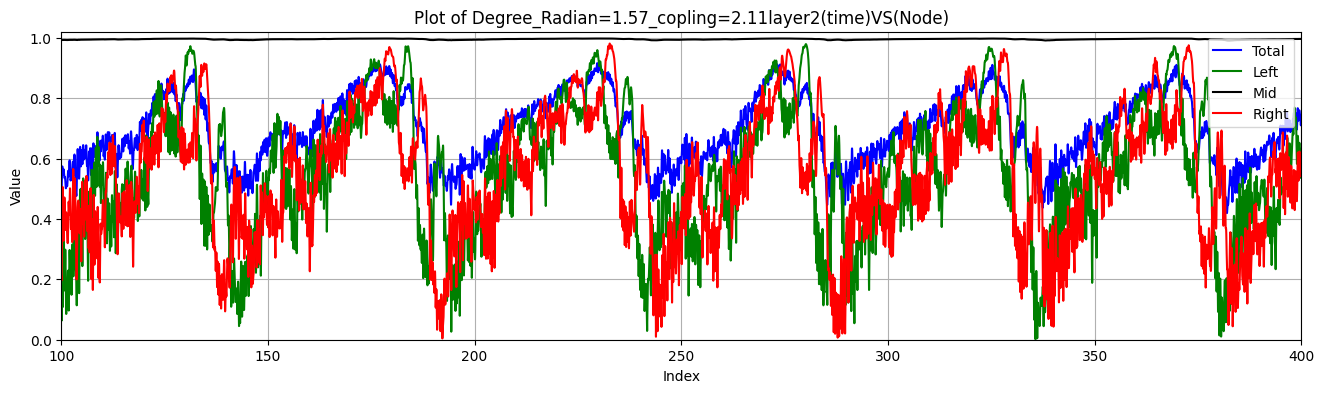

In [63]:
import matplotlib.pyplot as plt


# load synchroney file
import numpy as np
directory_output= './Python/Synchrony(T_L_M_R)/'
name_file='Degree_Radian=1.57_copling=2.11layer2(time)VS(Node)'
loaded = np.load(directory_output + name_file+'.npz')
data_syncint16 = loaded['phases']



time_arr = np.linspace(100, 400, dataint16.shape[0])

plt.figure(figsize=(16, 4))  # کشیده‌تر شدن پلات

plt.plot(time_arr, data_syncint16[0], label="Total",c='b')
plt.plot(time_arr, data_syncint16[1], label="Left",c='g')
plt.plot(time_arr, data_syncint16[2], label="Mid",c='k')
plt.plot(time_arr, data_syncint16[3], label="Right",c='r')

plt.xlabel("Index")
plt.ylabel("Value")
plt.title(f"Plot of {name_file}")
plt.xlim(100, 400)
plt.ylim(0, 1.02)
plt.legend(loc=1)
plt.grid(True)

plt.show()


# محاسبه ی همگامی کلی بعلاوه خطای میله ای

In [54]:
import numpy as np
from scipy import stats

def stats_summary(data, confidence=0.95):
    """
    Calculate mean, standard deviation, SEM, and confidence interval for a 1D array.
    
    Parameters:
        data (array-like): Input array of values.
        confidence (float): Confidence level for the interval (default: 0.95)
    
    Returns:
        dict: A dictionary with mean, std, sem, and confidence interval (tuple).
    """
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    sem = std / np.sqrt(n)
    
    # t-score for two-tailed CI
    t_score = stats.t.ppf((1 + confidence) / 2.0, df=n-1)
    margin = t_score * sem
    ci = (mean - margin, mean + margin)
    
    return {
        'mean': mean,
        'std': std,
        'sem': sem,
        'confidence_interval': ci
    }



results = stats_summary(data_syncint16[0])

print(f"Mean = {results['mean']:.3f}")
print(f"Standard Deviation = {results['std']:.3f}")
print(f"SEM = {results['sem']:.3f}")
print(f"95% Confidence Interval [Lower Bound,Upper Bound] = {results['confidence_interval']}")

Mean = 0.698
Standard Deviation = 0.115
SEM = 0.001
95% Confidence Interval [Lower Bound,Upper Bound] = (0.6962750712588857, 0.6988678545175775)
